In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from collections import OrderedDict
from collections.abc import Iterable
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from src.d06_reporting.report import Report

# DSSG Report: SFUSD Equity Tiebreaker

# Exploratory Data Analysis

# FRL an AALPI Data

# Gentrification Sanity Check

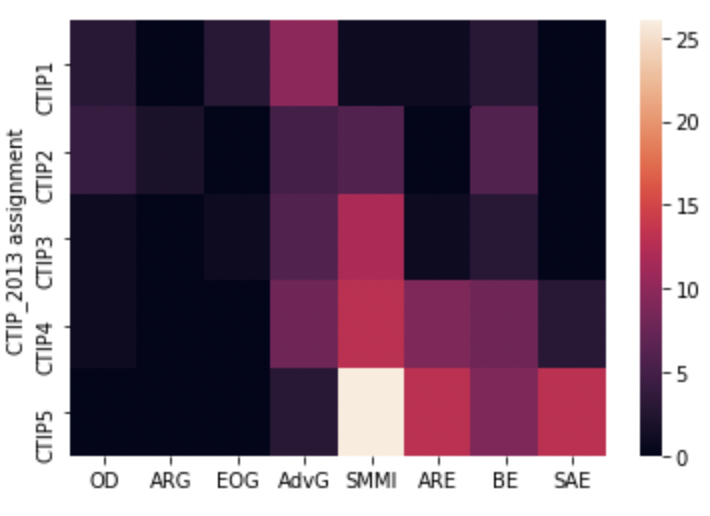

This is a heatmap of gentrification typology of tracts in the SFUSD compared against CTIP quintile scores. The x-axis is sorted in increasing order of gentrification or displacement. CTIP refers to a tract's average score on the 2006-2009 ELA exams. A tract in the first quintle of CTIP scores, or CTIP1, has the lowest scores. In contrast, tracts in CTIP5 have the highest test scores. 

We can see that, as the CTIP quiniles increase, the majority of tracts fall into the more extreme side of the gentrification spectrum. 

<img src='demographic vs ctip.png' width="400" height="400">
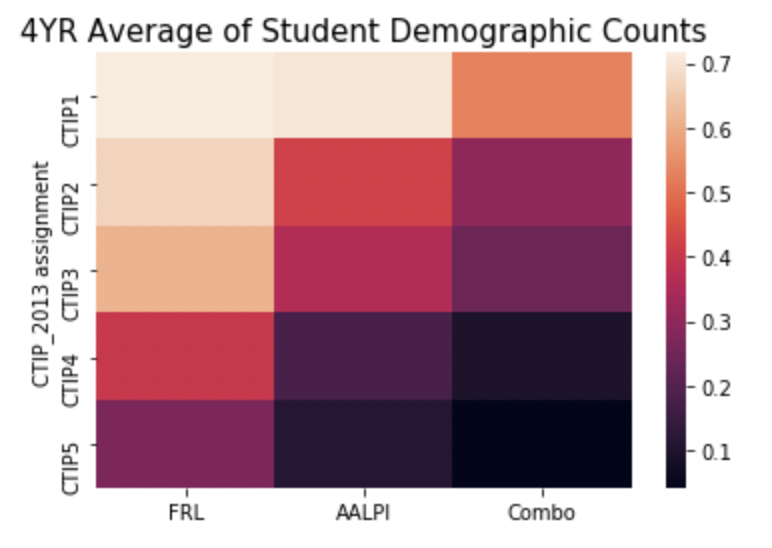

This heatmap all of the census tracts in SFUSD averaged by CTIP assignment. The x-axis reveals the average percentage of FRL, AALPI, or both in various census tracts. The y-axis reveals the CTIP_2013 assignment of these census tracts. We can see that the CTIP1 tracts hold a higher percentage of focal students. FRL and AALPI students are concretated in lower CTIP areas, though there seems to be a higher proportion of FRL students in those tracts. 

# Evaluation of Tiebreakers

We are going to consider two methodologies to evaluate different tiebreakers: sample evaluation and counterfactual simulation.

## Sample Evaluation

The sample evaluation consists on comparing the portion of _focal_ students benefited with the equity tiebreaker (true positive rate) with the portion of _non-focal_students_ (false positives).

`TPR = TP / (TP + FN)`

`FNR = FP / (FP + TN)`

## Counterfactual Simulation

The counterfactual simulation consists of using the school assignment simulation engine to evaluate and compare the average performance of _focal_ students in the school assignment process under the proposed equity tiebreaker. This is what is important after all.

### Tiebreaker Methodologies

#### Naive

Order the blocks by how many focal students they have. We consider two orderings, by absolute number of students and by relative number of students (`rate=True`). By relative number of students we mean the proportion of focal students within the block.

#### CTIP1

A student is labeled as _focal_ if they live in a block that belongs to the first CTIP quintile. This is the baseline.

#### Knapsack Problem

We model the process of selecting or labeling the blocks as a Knapsack Problem. The [Knapsack Problem](https://en.wikipedia.org/wiki/Knapsack_problem) is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine which items to include in a collection so that the total weight is less than or equal to a given limit, and the total value is as large as possible.

Under this formulation, the items we are trying to select are the blocks, and the values and weights are the numbers of _focal_  and _non-focal_ students in that block, respectively. The limit on the total weight is our tolerance to the total number of _non-focal_ students that obtain the equity tiebreaker. In other words, this limit is the number of false positives (FP) and is equal to the FPR times the total number of _non-focal_ students (N).

We expect the block selection obtained by this method to yield the maximum TPR for a given FPR.

#### Propositions


# Sample Evaluation Results

## TK12

First, we evaluated the classification models using the data provided by SFUSD for the counts of focal students from TK12. This data includes the counts of African American, Latinx, and Pacific Islander (AALPI) students and Free or Reduced Lunch (FRL) students for each block. The SFUSD team grouped blocks with less than five students.

In [ ]:
# Plot the ROC curves for different models for the TK12 FRL and AALPI data and the proposition:

Report.classifier_evalutaion_roc(frl_key = 'tk12')

## TK5

We alsoe evaluated the classification models using the data provided by SFUSD for the counts of focal students from TK5.

In [ ]:
# Plot the ROC curves for different models for the TK12 FRL and AALPI data and the proposition:

Report.classifier_evalutaion_roc(frl_key = 'tk5')